# Task 2: Sentiment and Thematic Analysis
___
### 1. Setup & Data Loading

In [1]:
import sys
import os

# Add project root (one directory above "notebooks")
sys.path.append(os.path.abspath(".."))

In [2]:
import pandas as pd
from transformers import pipeline
from scripts.sentiment_analysis import apply_sentiment_pipeline
from scripts.visualizations import plot_bank_cx_insights

c:\Users\natty\Downloads\KAIM\fintech-app-cx-analytics\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df = pd.read_csv("../data/processed/cleaned_reviews.csv", parse_dates=["date"])
df.shape  # expect 1547 x 5

(1547, 5)

### 2 Sentiment Analysis with DistilBERT

In [4]:
# Load DistilBERT Sentiment Model
sentiment_pipeline = pipeline(
    "sentiment-analysis",
    model="distilbert-base-uncased-finetuned-sst-2-english",
    device=-1,           # CPU (set 0 for GPU)
    batch_size=32
)

Device set to use cpu


In [6]:
# Apply Sentiment Model to Reviews
results = apply_sentiment_pipeline(df["review"].tolist(), sentiment_pipeline)

# Clean labels
df["sentiment"] = [r["label"].lower() for r in results]
df["confidence"] = [r["score"] for r in results]

# Map to numeric score
df["sentiment_score"] = df["sentiment"].map({
    "positive": 1,
    "negative": -1
})

print("DistilBERT sentiment analysis complete!")

DistilBERT sentiment analysis complete!


In [7]:
# Quick Check
df["sentiment"].value_counts()

sentiment
positive    970
negative    577
Name: count, dtype: int64

In [8]:
# Mean sentiment score per bank
bank_sentiment = df.groupby("bank")["sentiment_score"].mean().round(3)
print("Average Sentiment Score per Bank (+1 = positive, -1 = negative):")
print(bank_sentiment.sort_values(ascending=False))



# Full breakdown: mean sentiment by bank AND rating
summary = df.groupby(["bank", "rating"])["sentiment_score"].agg(["mean", "count"]).round(3)
summary = summary.rename(columns={"mean": "avg_sentiment_score"})
print("\nDetailed breakdown (required by challenge):")
summary.unstack().style.background_gradient(cmap="RdYlGn", axis=None)

Average Sentiment Score per Bank (+1 = positive, -1 = negative):
bank
DASHEN    0.449
CBE       0.393
BOA      -0.082
Name: sentiment_score, dtype: float64

Detailed breakdown (required by challenge):


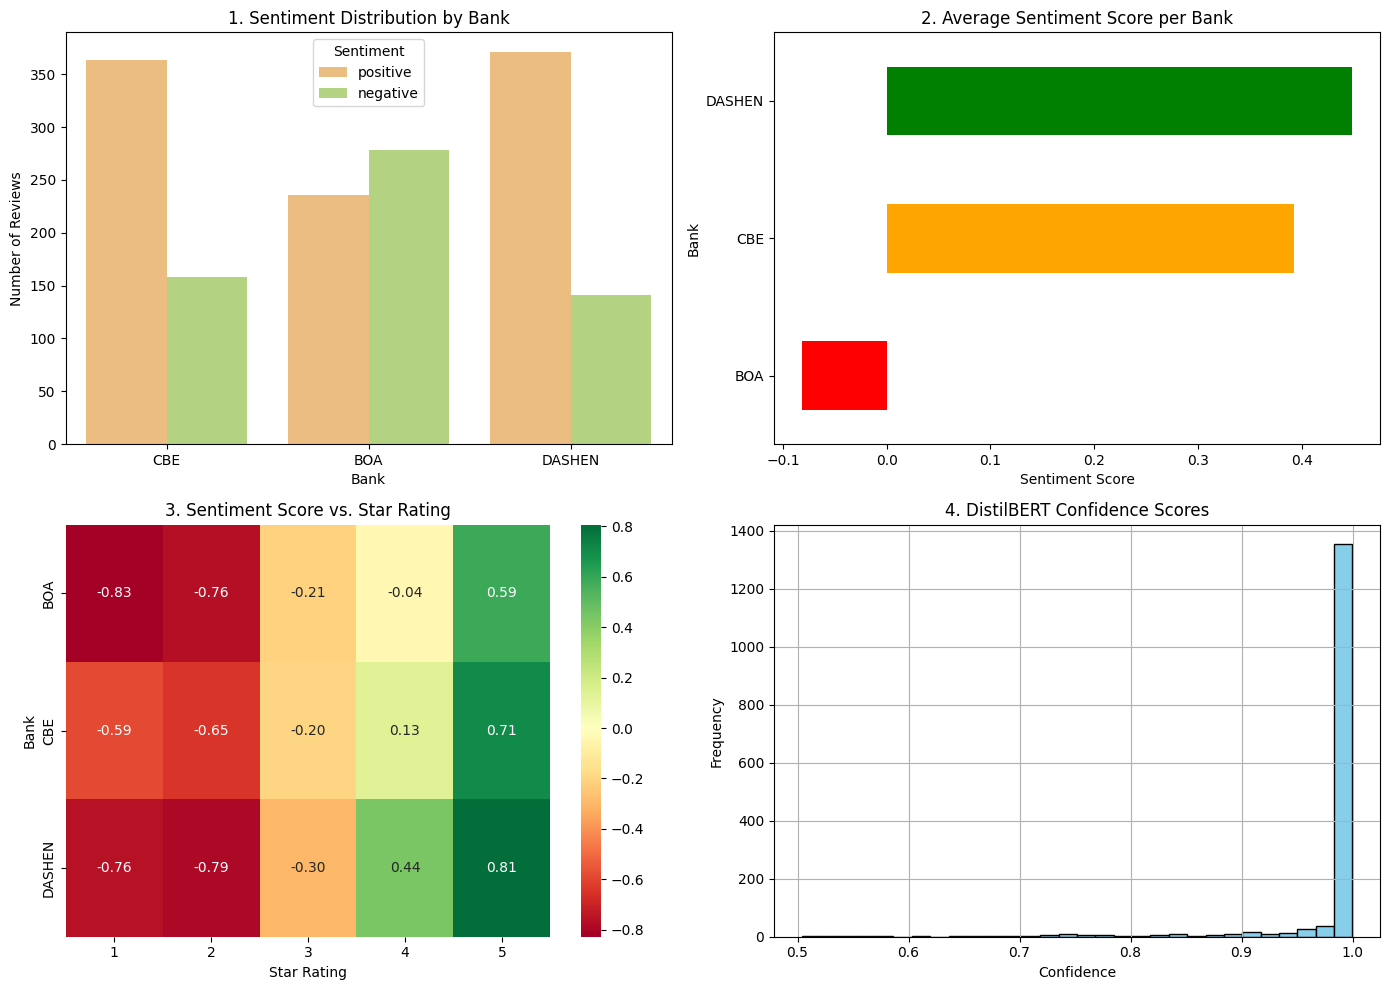

In [9]:
plot_bank_cx_insights(df,bank_sentiment)

In [10]:
# Save Sentiment Output
df.to_csv("../data/processed/reviews_with_sentiment_bert.csv", index=False)
print("💾 Saved processed sentiment dataset.")


💾 Saved processed sentiment dataset.
